<h1 style="background-color:black
;font-family:newtimeroman;font-size:225%;text-align:center; color:#40E0D0"> Diabetes data Prediction</h1><a id=0></a>

## importing the liberaries 

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.metrics import accuracy_score

## Data exploring 

In [2]:
data=pd.read_csv("diabetes.csv")

In [3]:
data 

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


### Data Cleaning 

In [6]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [7]:
data.duplicated().sum()

0

In [8]:
#checking for zero values 
print(data[data['BloodPressure']==0].shape[0])
print(data[data['Glucose']==0].shape[0])
print(data[data['SkinThickness']==0].shape[0])
print(data[data['Insulin']==0].shape[0])
print(data[data['BMI']==0].shape[0])

35
5
227
374
11


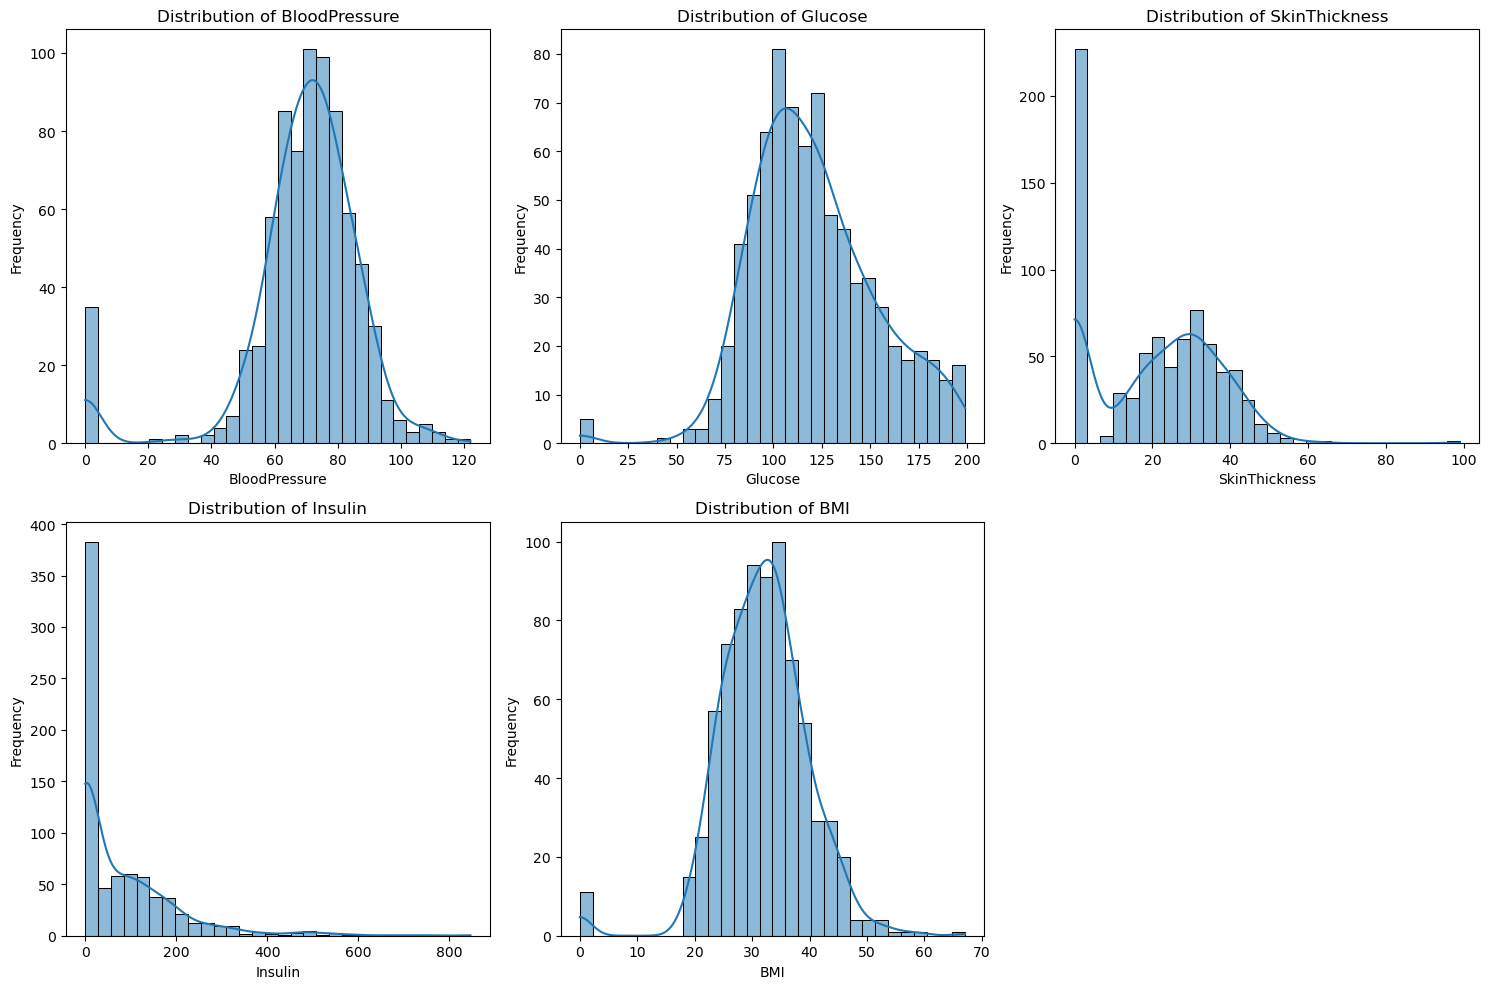

In [9]:
# showing the destributions of features 
columns_with_zeros = ['BloodPressure', 'Glucose', 'SkinThickness', 'Insulin', 'BMI']

plt.figure(figsize=(15, 10))
for i, column in enumerate(columns_with_zeros, 1):
    plt.subplot(2, 3, i)  
    sns.histplot(data[column], bins=30, kde=True)
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

In [10]:
#repacing zero values 
data['Glucose']=data['Glucose'].replace(0,data['Glucose'].mean())#normal distribution
data['BloodPressure']=data['BloodPressure'].replace(0,data['BloodPressure'].mean())#normal distribution
data['SkinThickness']=data['SkinThickness'].replace(0,data['SkinThickness'].median())#skewed distribution
data['Insulin']=data['Insulin'].replace(0,data['Insulin'].median())#skewed distribution
data['BMI']=data['BMI'].replace(0,data['BMI'].median())#skewed distribution

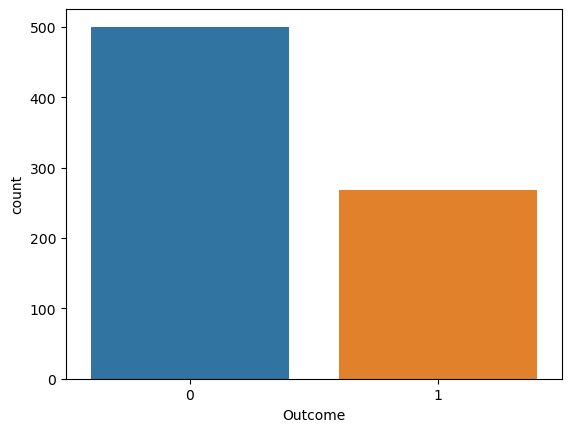

number of people who have the desies is 268
number of people who dont have the desies is 500


In [11]:
# Distribution of Outcome
sns.countplot(x='Outcome', data=data)
plt.show()

num_people_with_disease = data[data['Outcome'] == 1].shape[0]
num_people_without_disease= data[data["Outcome"]!=1].shape[0]

print (f"number of people who have the desies is {num_people_with_disease}")
print (f"number of people who dont have the desies is {num_people_without_disease}")

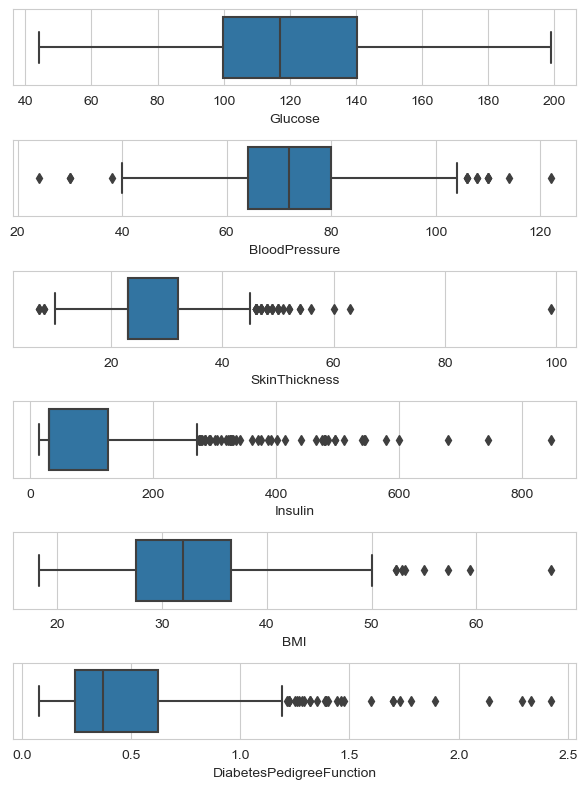

In [31]:
#finding outliers 
fig, axes = plt.subplots(6, 1, figsize=(6, 8))

sns.boxplot(x=data['Glucose'],ax=axes[0])
sns.boxplot(x=data['BloodPressure'],ax=axes[1])
sns.boxplot(x=data['SkinThickness'],ax=axes[2])
sns.boxplot(x=data['Insulin'],ax=axes[3])
sns.boxplot(x=data['BMI'],ax=axes[4])
sns.boxplot(x=data['DiabetesPedigreeFunction'],ax=axes[5])
plt.tight_layout()
plt.show()

From the observation, only Glucose that having no Outliers

## feature selection 

<Axes: >

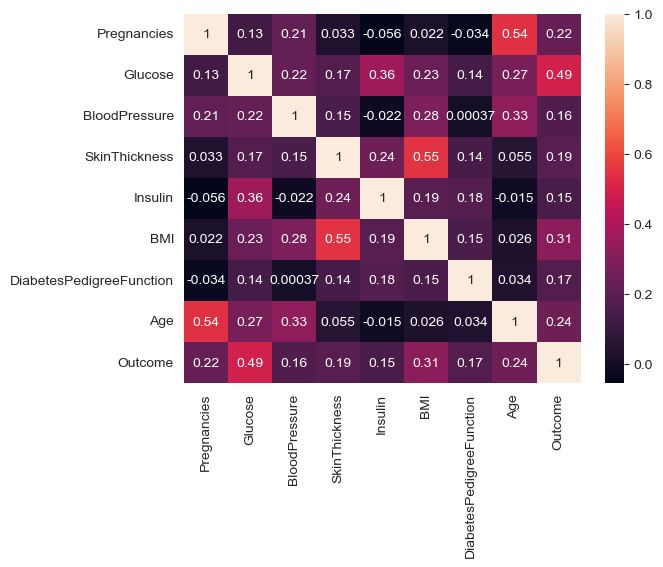

In [13]:
# finding corelations 
corrmat=data.corr()
sns.heatmap(corrmat, annot=True)

**Measure Importance of Feature using KBest**

In [14]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
X = data.drop(['Outcome'],axis = 1)  #independent columns
y = data['Outcome']    #target column i.e price range
#apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2, k=4)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(10,'Score'))  #print 10 best features

                      Specs        Score
4                   Insulin  1989.589394
1                   Glucose  1418.660636
7                       Age   181.303689
0               Pregnancies   111.519691
5                       BMI   108.933725
3             SkinThickness    85.431282
2             BloodPressure    41.394665
6  DiabetesPedigreeFunction     5.392682


In [15]:
#selecting features 
data_sf = data.drop(['DiabetesPedigreeFunction','BloodPressure','SkinThickness'], axis = 1)
data_sf.columns

Index(['Pregnancies', 'Glucose', 'Insulin', 'BMI', 'Age', 'Outcome'], dtype='object')

## Handeling outliers 

In [16]:
from sklearn.preprocessing import QuantileTransformer
x=data_sf
quantile  = QuantileTransformer()
X = quantile.fit_transform(x)
data_new=quantile.transform(X)
data_new=pd.DataFrame(X)
data_new.columns =['Pregnancies', 'Glucose', 'Insulin', 'BMI', 'Age', 'Outcome']
data_new.head()

c:\Users\Compu Market\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:2762: UserWarning: n_quantiles (1000) is greater than the total number of samples (768). n_quantiles is set to n_samples.
  warnings.warn(
c:\Users\Compu Market\anaconda3\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but QuantileTransformer was fitted with feature names
  warnings.warn(


,Pregnancies,Glucose,Insulin,BMI,Age,Outcome
0,0.747718,0.810300,0.256193,0.591265,0.889831,1.0
1,0.232725,0.091265,0.256193,0.213168,0.558670,0.0
2,0.863755,0.956975,0.256193,0.077575,0.585398,1.0
3,0.232725,0.124511,0.662973,0.284224,0.000000,0.0
4,0.000000,0.721643,0.834420,0.926988,0.606258,1.0


<Axes: xlabel='Insulin'>

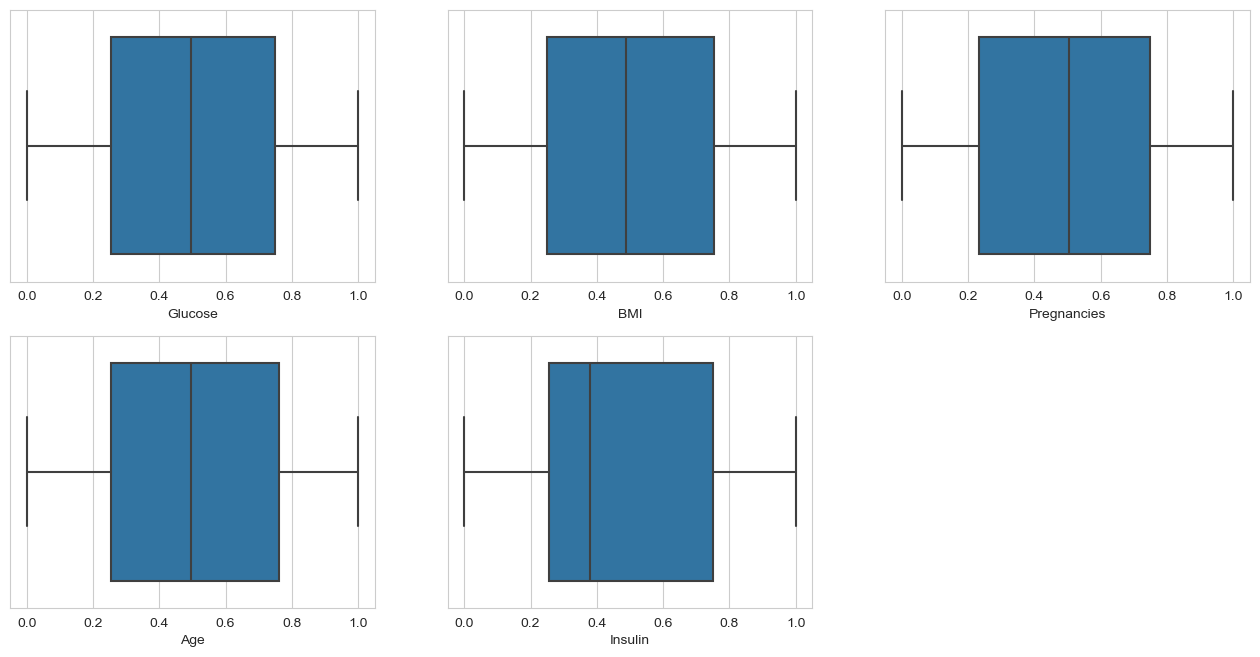

In [21]:
plt.figure(figsize=(16,12))
sns.set_style(style='whitegrid')
plt.subplot(3,3,1)
sns.boxplot(x=data_new['Glucose'],data=data_new)
plt.subplot(3,3,2)
sns.boxplot(x=data_new['BMI'],data=data_new)
plt.subplot(3,3,3)
sns.boxplot(x=data_new['Pregnancies'],data=data_new)
plt.subplot(3,3,4)
sns.boxplot(x=data_new['Age'],data=data_new)
plt.subplot(3,3,5)
sns.boxplot(x=data_new['Insulin'],data=data_new)

## Machine learning 
### spletting data for train and test 


In [18]:
x=data_new.iloc[:,:-1]
y=data_new.iloc[:,-1]

In [19]:
X_train , X_test , Y_train , Y_test = train_test_split(x,y,test_size= 1/3 , random_state=0)

Modelling 

In [23]:
lg= LogisticRegression(random_state=0)
lg.fit(X_train,Y_train)

LogisticRegression(random_state=0)

In [24]:
accuracy = lg.score(X_test, Y_test)
print(f"Model Accuracy: {accuracy * 100:.2f}%")

Model Accuracy: 75.78%


Confusion Matrix:
[[152  19]
 [ 43  42]]


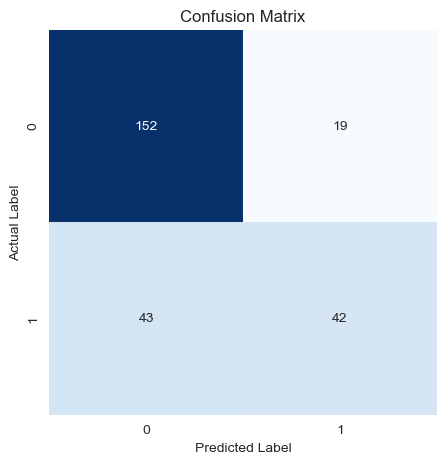

Precision: 0.75
Recall: 0.76
F1-Score: 0.75
Classification Report:
              precision    recall  f1-score   support

         0.0       0.78      0.89      0.83       171
         1.0       0.69      0.49      0.58        85

    accuracy                           0.76       256
   macro avg       0.73      0.69      0.70       256
weighted avg       0.75      0.76      0.75       256



In [25]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, classification_report

y_pred = lg.predict(X_test)


cm = confusion_matrix(Y_test, y_pred)
print("Confusion Matrix:")
print(cm)

plt.figure(figsize=(5,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()


precision = precision_score(Y_test, y_pred, average='weighted')
recall = recall_score(Y_test, y_pred, average='weighted')
f1 = f1_score(Y_test, y_pred, average='weighted')

print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")


report = classification_report(Y_test, y_pred)
print("Classification Report:")
print(report)


## prediction model 

In [53]:
import pickle

with open ("diabets_model.pkl", "wb")as file :
    pickle.dump(lg ,file)
    

In [55]:
with open ("diabets_model.pkl", "rb")as file :
      loaded_model= pickle.load(file)


user=list(map(float,input().split()))
user_data=[user]
prediction = loaded_model.predict(user_data) 


def predetion_model (test):

    if test==0:
        return " this person is not having the diabetes "
    else :
        return " this person having the diabtes "

predetion_model(prediction)
 

c:\Users\Compu Market\anaconda3\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


' this person having the diabtes '